In [1]:
from sllab import *


# A utility from https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
# Adapted and changed to Labelbonarizer that fits with the whole dataframe.
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode
        self.lb = pp.LabelEncoder()
        
    def fit(self,X,y=None):
        self.lb.fit(np.concatenate(X.to_numpy(), axis=0))
        return self

    def transform(self,X):
        output = X.copy() #.astype(object)
        if self.columns is None:
            self.columns = output.columns
        
        for col_id, col in enumerate(self.columns):
            #self.lb.fit(output[col])
            transf = self.lb.transform(output[col])
            output[col] = transf
            #for id, el in enumerate(transf):
            #    output.iloc[id, col_id] = el
                
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    


Packages:
    numpy as np
    matplotlib.pyplot as plt
    pandas as pd

Functions:
    plotXY
    plot_frontiere



In [2]:
dataset = pd.read_csv("agaricus-lepiota.data",
                    skiprows=9,
                    skipfooter=1)

In [3]:
dataset.head()

,e,b,s,y,t,a,f,c,b.1,g,...,s.2,w,w.1,p,w.2,o,p.1,k,s.3,m
0,e,x,y,y,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,n,g
1,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,s,m
2,e,b,s,y,t,a,f,c,b,w,...,s,w,w,p,w,o,p,n,s,g
3,p,x,y,w,t,p,f,c,n,k,...,s,w,w,p,w,o,p,n,v,u
4,e,x,f,n,f,n,f,w,b,n,...,f,w,w,p,w,o,e,k,a,g


In [4]:
classes = np.array([
    'class',
    'cap-shape', 
    'cap-surface', 
    'cap-color',
    'bruises?',
    'odor',
    'gill-attachment',
    'gill-spacing',
    'gill-size',
    'gill-color',
    'stalk-shape',
    'stalk-root',
    'stalk-surface-above-ring',
    'stalk-surface-below-ring',
    'stalk-color-above-ring',
    'stalk-color-below-ring',
    'veil-type',
    'veil-color',
    'ring-number',
    'ring-type',
    'spore-print-color',
    'population',
    'habitat'])

featured_classes = np.array([
    'cap-shape', 
    'cap-surface', 
    'cap-color',
    'bruises?',
    'odor',
    'gill-attachment',
    'gill-spacing',
    'gill-size',
    'gill-color',
    'stalk-shape',
    'stalk-root',
    'stalk-surface-above-ring',
    'stalk-surface-below-ring',
    'stalk-color-above-ring',
    'stalk-color-below-ring',
    'veil-type',
    'veil-color',
    'ring-number',
    'ring-type',
    'spore-print-color',
    'population',
    'habitat'])

In [5]:
dataset = pd.DataFrame(dataset.values, columns=classes)
X_data, y_data = pd.DataFrame(dataset, columns=featured_classes), pd.DataFrame(dataset, columns=['class'])

In [6]:
from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(MultiColumnLabelEncoder().fit_transform(X_data))
#y = StandardScaler().fit_transform(MultiColumnLabelEncoder().fit_transform(y_data))
X = MultiColumnLabelEncoder().fit_transform(X_data)
y = MultiColumnLabelEncoder().fit_transform(y_data)

In [7]:
X.shape

(8113, 22)

In [8]:
print("Normalized data mean, and a standard deviation",np.mean(X),np.std(X))

Normalized data mean, and a standard deviation cap-shape                   12.869839
cap-surface                 15.532109
cap-color                   11.708000
bruises?                    10.565142
odor                        10.606434
gill-attachment              5.871194
gill-spacing                 5.747073
gill-size                    5.092567
gill-color                  10.852582
stalk-shape                 11.814249
stalk-root                   2.177000
stalk-surface-above-ring    13.290768
stalk-surface-below-ring    13.482559
stalk-color-above-ring      15.876618
stalk-color-below-ring      15.817453
veil-type                   14.000000
veil-color                  19.825342
ring-number                 13.291384
ring-type                   10.226427
spore-print-color           12.928017
population                  17.313078
habitat                      8.076174
dtype: float64 cap-shape                   7.496994
cap-surface                 6.541714
cap-color                   

In [9]:
MultiColumnLabelEncoder().fit_transform(X_data).tail()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8108,9,22,12,6,6,6,3,12,2,17,...,16,14,20,14,20,13,5,20,19,4
8109,9,16,12,6,12,1,3,2,22,5,...,16,13,13,14,13,13,14,2,3,10
8110,21,16,12,6,12,1,3,2,22,5,...,16,13,13,14,12,13,14,2,19,10
8111,6,16,12,6,12,1,3,2,12,5,...,16,13,13,14,13,13,14,2,3,10
8112,9,22,12,6,22,6,3,12,2,17,...,9,20,20,14,20,13,5,20,19,10


In [10]:
X

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,21,22,22,17,10,6,3,2,7,5,...,16,20,20,14,20,13,14,12,12,7
1,21,22,22,17,1,6,3,2,12,5,...,16,20,20,14,20,13,14,9,16,11
2,2,16,22,17,1,6,3,2,20,5,...,16,20,20,14,20,13,14,12,16,7
3,21,22,20,17,14,6,3,12,9,5,...,16,20,20,14,20,13,14,12,19,18
4,21,6,12,6,12,6,20,2,12,17,...,6,20,20,14,20,13,5,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8108,9,22,12,6,6,6,3,12,2,17,...,16,14,20,14,20,13,5,20,19,4
8109,9,16,12,6,12,1,3,2,22,5,...,16,13,13,14,13,13,14,2,3,10
8110,21,16,12,6,12,1,3,2,22,5,...,16,13,13,14,12,13,14,2,19,10
8111,6,16,12,6,12,1,3,2,12,5,...,16,13,13,14,13,13,14,2,3,10


In [11]:
#Normalizing data
feat_cols = ['feature_'+str(i) for i in range(X.shape[1])]
normalized_data = pd.DataFrame(X,columns=feat_cols)
normalized_data.tail()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21
8108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [13]:
pca_df = pd.DataFrame(data = pca.fit_transform(X), columns = ['PCA1', 'PCA2'])
pca_df.tail()

,PCA1,PCA2
8108,14.033330,-4.029665
8109,-12.119898,3.347591
8110,-13.678542,-2.485753
8111,-6.916705,2.418154
8112,19.642776,-2.686996


In [14]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.19185385 0.14097976]


<Figure size 432x288 with 0 Axes>

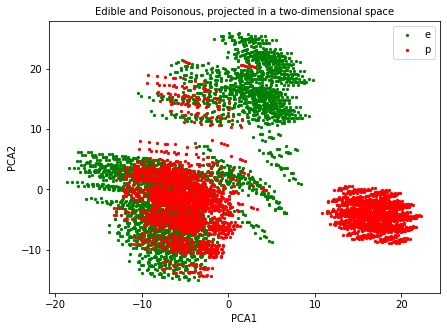

In [15]:
plt.figure()
plt.figure(figsize=(7,5))
plt.xlabel('PCA1',fontsize=10)
plt.ylabel('PCA2',fontsize=10)
plt.title("Edible and Poisonous, projected in a two-dimensional space",fontsize=10)
targets = ['e', 'p']
colors = ['g','r']
for target, color in zip(targets,colors):
    indicesToKeep = dataset['class'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'PCA1'], pca_df.loc[indicesToKeep, 'PCA2'], c = color, s = 5)

plt.legend(targets,prop={'size': 10})

In [31]:
#y_labels = y.astype(int)[:,-1] # Parsing into a boolean values
y_labels = y.astype(int).values[:,-1]
random_state = 42

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y_labels, random_state=random_state)

In [32]:
## How do we define a good value for n_neighbors or k value?
# Using a square root of the data length and checking that it is an odd number!

#import math
#math.sqrt(len(y_test))
## 82.04876598706406

## So, the optimal value for k is 82 - 1
n_neighbors = 81

Text(0, 0.5, 'Accuracy')

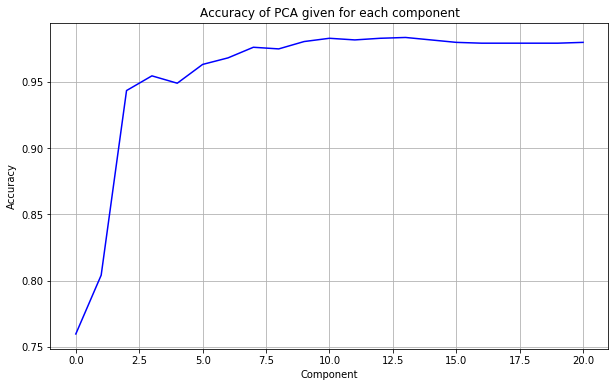

In [58]:
## 22 is the max number of components given the available features
from time import time
acc = []
tt = list()

for i in range(1,len(featured_classes)):
    #PIPELINE
    start = time()
    pca = make_pipeline(PCA(n_components=i, random_state=random_state))
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,p=2,metric='euclidean')
    pca.fit(X_train, y_train)
    knn.fit(pca.transform(X_train), y_train)
    
    acc_knn = knn.score(pca.transform(X_test), y_test)
    tt.append(time() - start)
    acc.append(acc_knn)
    
plt.figure(figsize=(10,6))
plt.plot(range(len(acc)), acc,'b-')
plt.grid(True)
plt.title("Accuracy of PCA given for each component")
plt.xlabel("Component")
plt.ylabel("Accuracy")

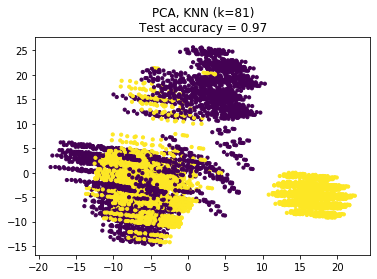

In [33]:
#PIPELINE
# Reduce dimension to 2 with PCA
# n_component=10 based on the accuracy test
pca = make_pipeline(PCA(n_components=10, random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
# p = 2 we are looking for Mushroom edible or not
knn = KNeighborsClassifier(n_neighbors=n_neighbors,p=2,metric='euclidean')
pca.fit(X_train, y_train)

#trans = pca.transform(X_train)
#print(trans, X_train.shape, y_train.shape)
# Fit a nearest neighbor classifier on the embedded training set
knn.fit(pca.transform(X_train), y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(pca.transform(X_test), y_test)

# Embed the data set in 2 dimensions using the fitted model
X_embedded = pca.transform(X)

# Plot the projected points and show the evaluation score
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_labels, s=10)
plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format('PCA', n_neighbors, acc_knn))
plt.show()

In [34]:
y_pred = knn.predict(pca.transform(X_test))

print(len(y_pred), y_pred.shape,len(y_test), len(X_test), X_test.shape)
print(y_pred)

2029 (2029,) 2029 2029 (2029, 22)
[1 1 1 ... 1 0 0]


In [35]:
print("Using PCA",classification_report(y_test, y_pred, target_names=['edible','poisonous']))

Using PCA               precision    recall  f1-score   support

      edible       0.97      0.98      0.97      1050
   poisonous       0.98      0.97      0.97       979

    accuracy                           0.97      2029
   macro avg       0.97      0.97      0.97      2029
weighted avg       0.97      0.97      0.97      2029



In [36]:
confusion_matrix(y_test,y_pred)

array([[1027,   23],
       [  30,  949]], dtype=int64)

In [54]:
tt

[0.1002345085144043,
 0.08461999893188477,
 0.08461785316467285,
 0.11585283279418945,
 0.10675048828125,
 0.14710664749145508,
 0.17835450172424316,
 0.23174047470092773,
 0.2630574703216553,
 0.2851734161376953,
 0.30075573921203613,
 0.2850971221923828,
 0.3007216453552246,
 0.300722599029541,
 0.3163433074951172,
 0.33847737312316895,
 0.35410356521606445,
 0.3320274353027344,
 0.3540959358215332,
 0.3853340148925781,
 0.385333776473999]

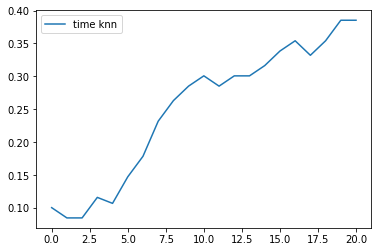

In [56]:
plt.plot(tt, label='time knn')
plt.legend()